# 기본적인 Machine Learning 의 용어와 개념 설명

## What is ML?
* **Limitations of explicit programming**
  - Spam filter: many rules
  - Automatic driving: too many rules    
  
 
* **Machine learning**: "Field of study that gives computers the ability to learn without being explicitly programmed” Arthur Samuel (1959)

## What is learning?
* **supervised learning**
 - learning with labeled examples - training set
 - 레이블이 정해져 있는 데이터를 이용해 학습하는 방법
  
  
* **unsupervised learning : un-labeled data**
 - Google news grouping
 - Word clustering (비슷한 단어를 모으기)
 
**주로 suvervised learning을 다룰 예정**  


* **Most common problem type in ML**
  - Image labeling: learning from tagged images
  - Email spam filter: learning from labeled (spam or ham)
email
  - Predicting exam score: learning from previous exam
score and time spent

### Types of supervised learning
* **Predicting final exam score based on time spent**  
  - regression
* **Pass/non-pass based on time spent**  
  - binary classification
* **Letter grade (A, B, C, E and F) based on time spent**  
  - multi-label classification

## What is regression?

## What is classification?

# Simple Linear Regression
* **Regression**
* **Linear Regression**
* **Hypothesis**
* **Which hypothesis is better?**
* **Cost, Cost function**
* **Goal: Minimize cost**

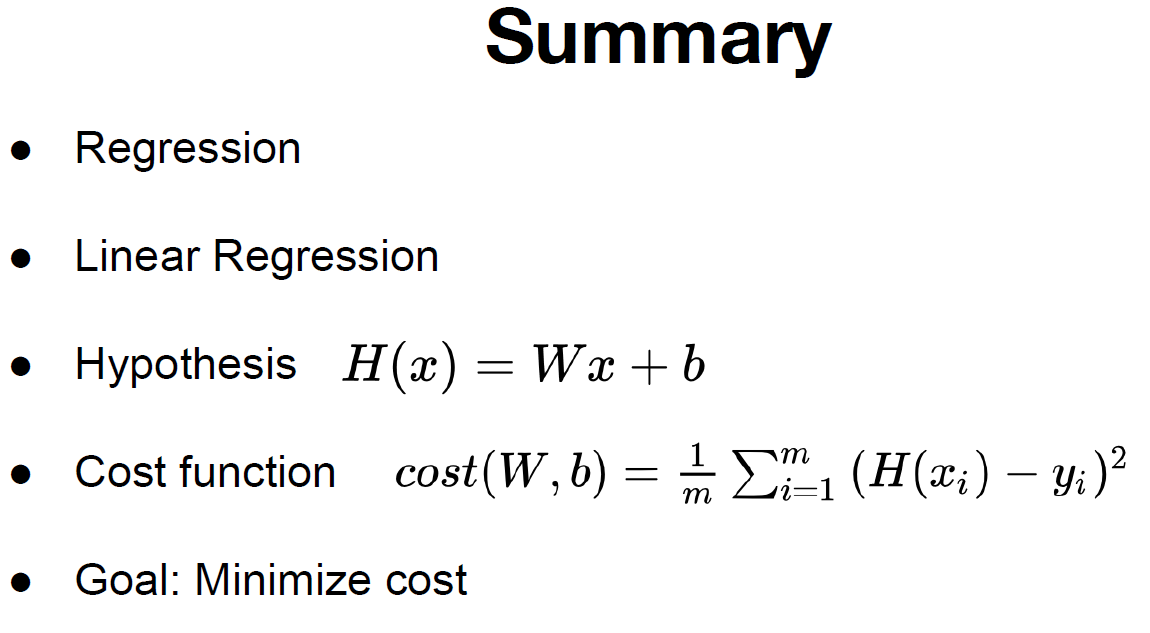

## Regression이란?
* **Regression toward the mean** (전체의 평균으로 되돌아간다.)
 - 전체의 평균으로 되돌아간다. 어떤 데이터들이 굉장히 크거나, 굉장히 작은 데이터들이 나와도 전체적으로 봤을 때 이 데이터들은 전체 평균으로 되돌아가려는 특징이 있다. 회귀하려는 특징이 있다.

## 선형회귀(Linear Regression) 이란?
* 데이터를 가장 잘 대변하는 직선의 방정식을 찾는 것.
  - y = ax+b
* Linear regreesion은 파란색 점 데이터들을 가장 잘 대변하는 직선의 방정식의 기울기와 y절편. 즉, 이 직선의 방정식의 a값과 b값을 구하는 것.

![python image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1024px-Linear_regression.svg.png)

### 가설 (Hypothesis)
* **H(x) = Wx+b**
 - 우리의 가설이 얼마나 데이터를 잘 대변하도록 W와 b를 어떻게 정할 수 있을까?

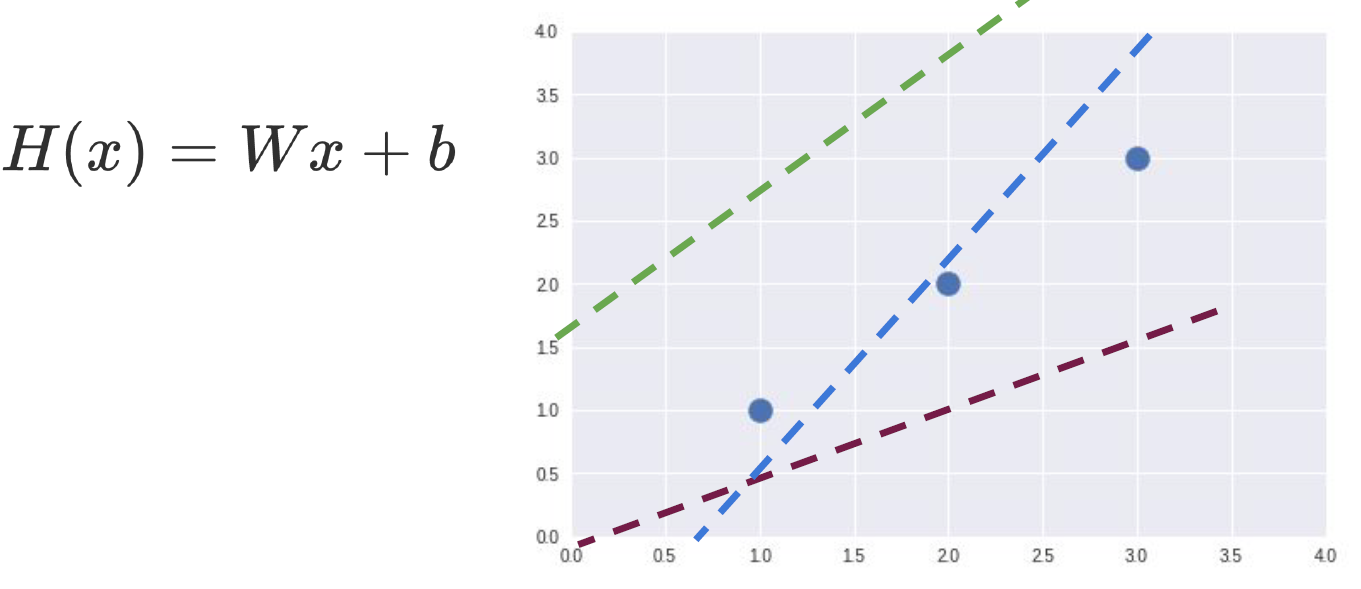

### Cost = Loss =  Error
* **H(x) = Wx+b** : W를 weight, b를 bias라고 부른다.
* **H(x)-y** : 차이
  - 차이의 총 합이 작을수록 이 직선이 데이터를 잘 대변하고 있다고 말할 수 있다.  
  
  
* **우리가 하려는 것 : Cost(Loss, Error)의 합을 최소화 하는 것**
  - 그냥 더할 경우 **H(x)-y** 의 값이 음수, 양수가 섞여있으므로 무의미할 수 있다. 때문에 제곱해서 평균을 낸다. 이것을 cost(W)라고 한다.  
  

* **우리의 목적은 minimize cost(W,b) : W(weight)와 b(bias)의 함수인 Cost를 최소화하는 W와 b를 찾는 것.**

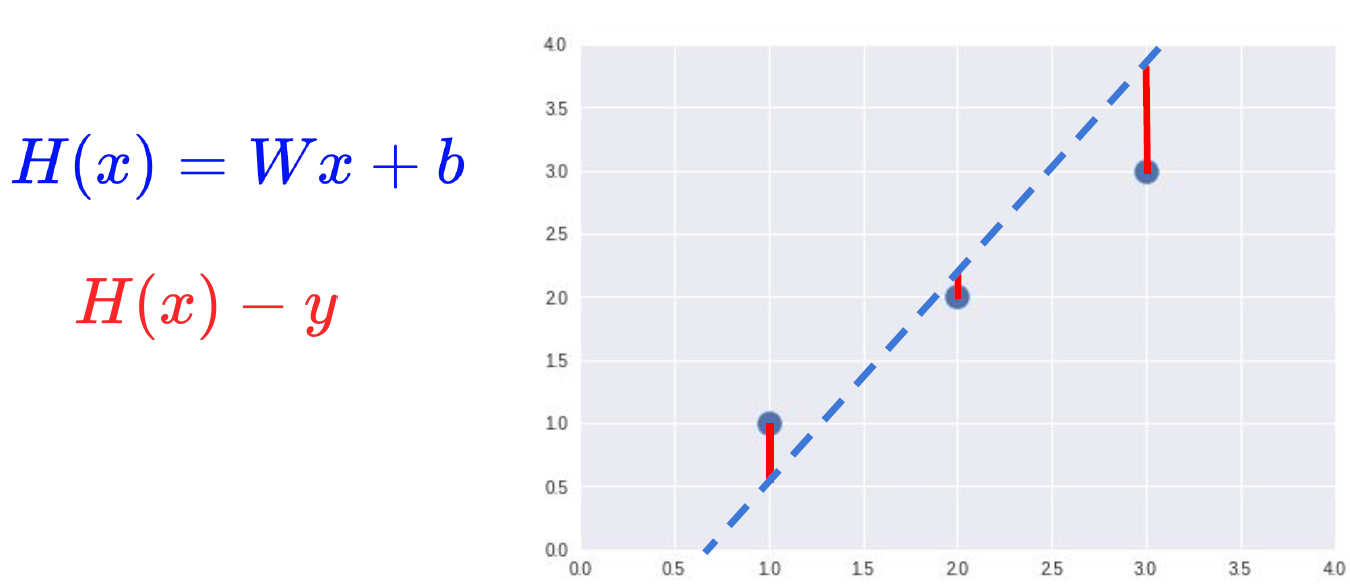

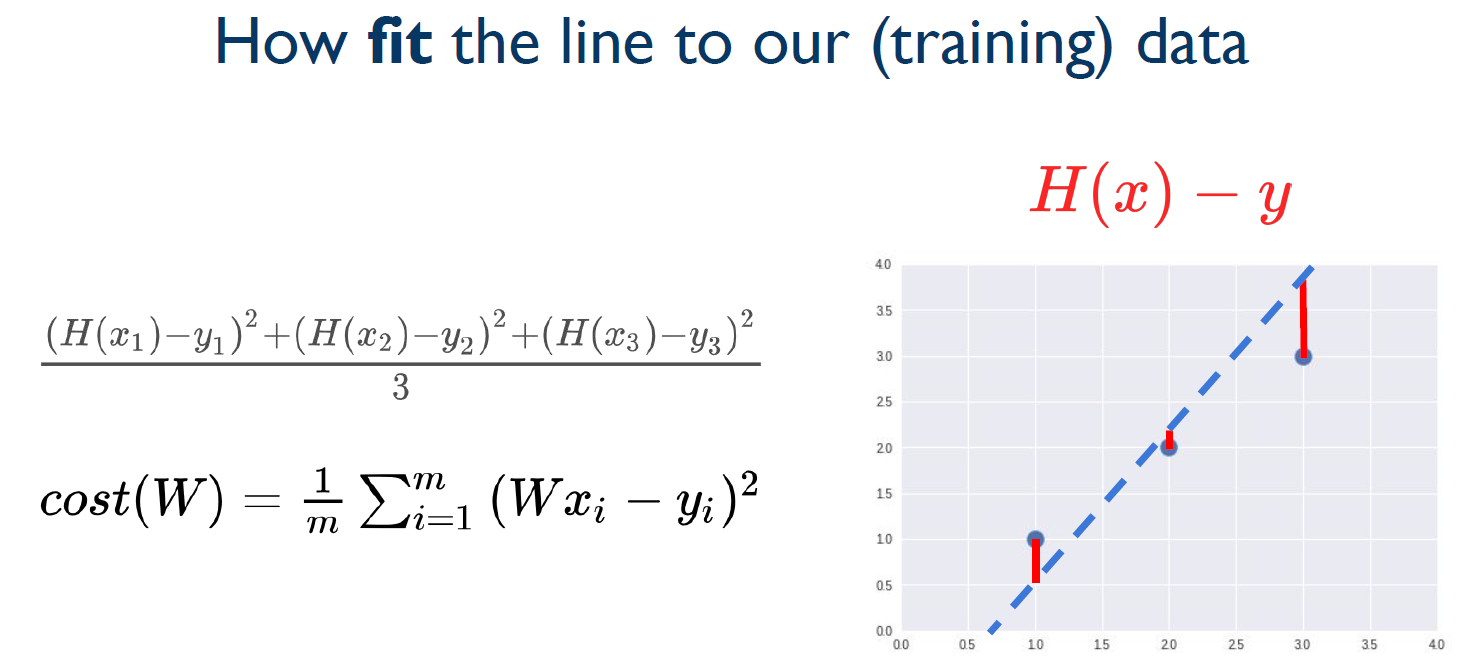
**y : 실제값**

## 2강 Tensorflow 2.x 버전 실습
[github lab파일](https://github.com/Herbteaa/studyML/blob/master/edwith_DL_zero_to_all/tf_2.x/lab-02-1-Simple-Linear-Regression-eager.ipynb)

In [1]:
import tensorflow as tf

$$H(x) = Wx + b$$

In [3]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

#나중에는 초기값을 랜덤으로 쓸 것임
W = tf.Variable(2.9)
b = tf.Variable(0.5)

#hypothesis W*x+b, 우리의 가설 함수
hypothesis = W * x_data + b

cost함수 구현하기
$$ cost(W,b)  = \frac{1}{m}\sum_{i=1}^m(H(x_{i})-y_{i})^2$$

In [5]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
cost

<tf.Tensor: shape=(), dtype=float32, numpy=45.660004>

In [11]:
v = [1., 2., 3., 4.]
tf.reduce_mean(v) # 2.5
#reduce의 의미 : 차원이 줄어든다. 차원, 즉 랭크가 줄어들면서 mean을 구한다.
#계산하려는 대상은 1차원이고, 그 결과는 0차원으로 랭크가 1에서 0으로 줄어듦

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [12]:
tf.square(3) #9
#넘겨받은 값을 제곱함

<tf.Tensor: shape=(), dtype=int32, numpy=9>

### Gradient descent 구현하기
* **Cost minimize 알고리즘은 여러가지 있다.**
* **그 중 가장 유명한 것이 Gradient descent**
  - Gradient : 경사, 기울기  
  - descent : 하강  
  - 경사 하강 알고리즘, 경사 하강법  
  - 경사를 하강, 내려가면서 cost가 최소가 되는 W와 b를 찾는 알고리즘

In [14]:
# Learning_rate initialize
learning_rate = 0.01

# Gradient descent
# GradientTape으로 구현하고, GradientTape은 일반적으로 with 구문과 함께 사용한다.
# with 구문 안에 있는 변수들의 변화를 테이프에 기록함
# 변수들(W,b)의 정보를 tape에 기록함.

with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    
# tape에 gradient메소드를 호출하여 경사도값, 미분값을 구한다.
# gradient 메소드는 함수(cost)에 대해서 변수들 [W, b]에 대한 개별 미분값
# 즉, 기울기 값을 구해서 튜플로 반환함.
# W_grad : cost 함수의 W에 대한 미분값
# b_grade : cost 함수의 b에 대한 미분값
W_grad, b_grad = tape.gradient(cost, [W, b])

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

# A.assign_sub(B) 는 A -= B와 같다.
# learning_rate : gradient 값을 얼마만큼 반영할 것인지를 결정한다.
# 주로 작은 값을 사용한다. 보통 0.001, 0.0001을 사용한다.

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.28135997>

위 과정이 한 블록이고, 이것을 반복하여 수행한다.

In [32]:
import tensorflow as tf

# tf.enable_eager_execution()
# 즉시 실행시키는 코드
# 기존 그래프 기반 방식에서 벗어나
# 그래프 생성 없이 연산을 즉시 실행하는 명령형 프로그래밍 환경을 뜻합니다.

# data
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01

# Gradient descent를 100번 수행함
for i in range(100):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i%10 == 0:
        print("{:5}|{:10.4}|{:10.4}|{:10.6f}|".format(i, W.numpy(), b.numpy(), cost))

    0|     2.452|     0.376| 45.660004|
   10|     1.104|  0.003398|  0.206336|
   20|     1.013|  -0.02091|  0.001026|
   30|     1.007|  -0.02184|  0.000093|
   40|     1.006|  -0.02123|  0.000083|
   50|     1.006|  -0.02053|  0.000077|
   60|     1.005|  -0.01984|  0.000072|
   70|     1.005|  -0.01918|  0.000067|
   80|     1.005|  -0.01854|  0.000063|
   90|     1.005|  -0.01793|  0.000059|


In [33]:
#predict
print(W*2.5+b) # 2.5
print(W*5+b) # 5.0

tf.Tensor(2.4946523, shape=(), dtype=float32)
tf.Tensor(5.0066934, shape=(), dtype=float32)


W : 우리가 예상한 1에 가까워지고 있다.  
b : 우리가 예상한 0에 가까워지고 있다.  
cost : 점차 줄어들고 있다.  

Epoch : 학습횟수

# Linear Regression and How to minimize cost

## Simplified hypothesis

b를 삭제, bias를 삭제

$$H(x) = Wx$$  
$$ cost(W)  = \frac{1}{m}\sum_{i=1}^m(H(x_{i})-y_{i})^2$$

## What cost(W) looks like?
W=0, cost(W)=??

## Gradient decent algorithm
* **Minimize cost function**
* **Gradient descent is used many minimization problems**
* **For a given cost function, cost (W, b), it will find W, b to minimize cost**
* **It can be applied to more general function: cost (w1, w2, ..., wn)**


### How it works?
* **Start with initial guesses**
  - Start at 0,0 (or any other value)
  - Keeping changing W and b a little bit to try and reduce cost(W, b)
* **Each time you change the parameters, you select the gradient which reduces cost(W, b) the most possible**
* **Repeat**
* **Do so until you converge to a local minimum**
* **Has an interesting property**
  - Where you start can determine which minimum you end up

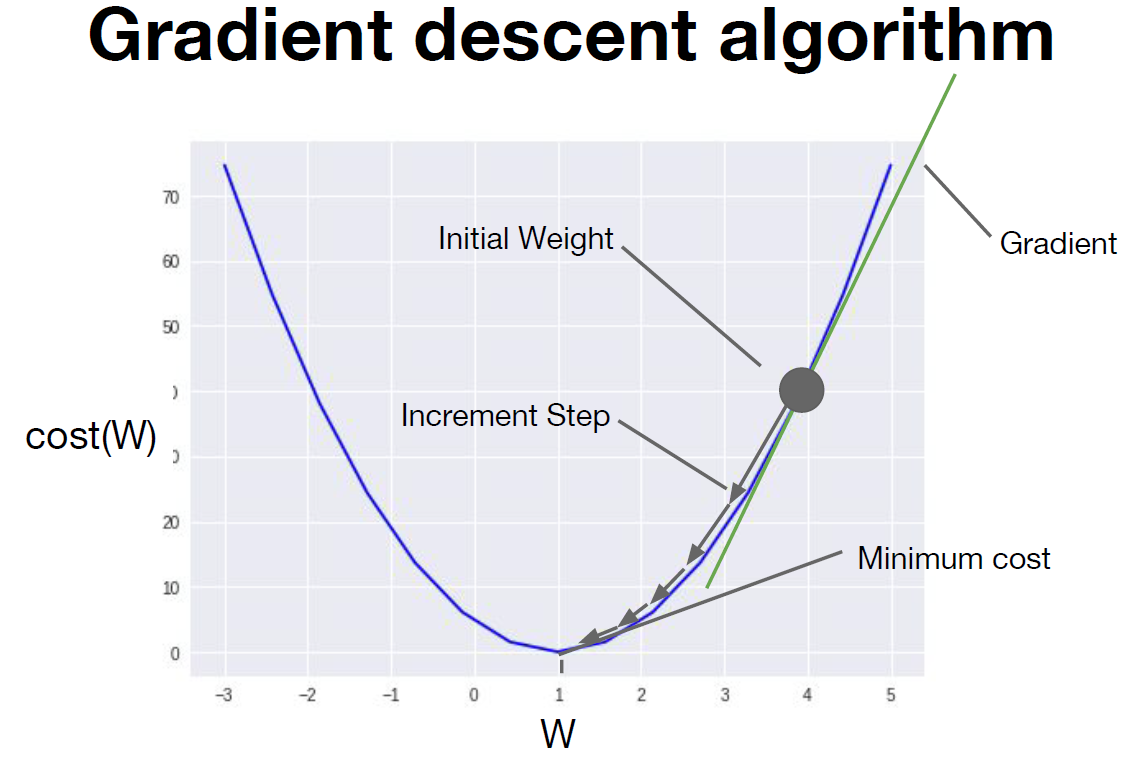

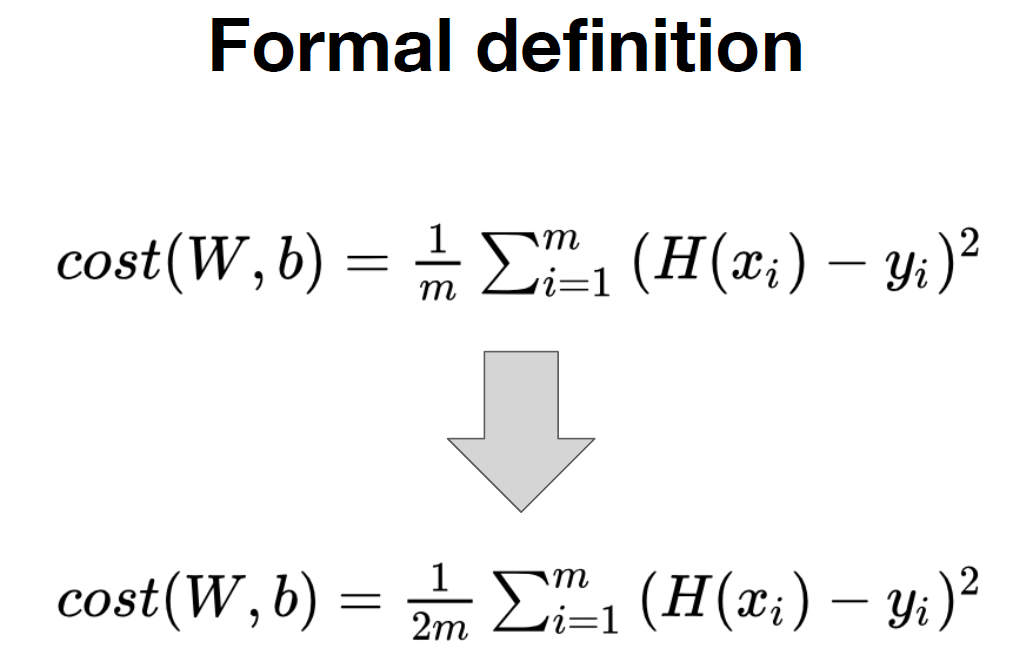

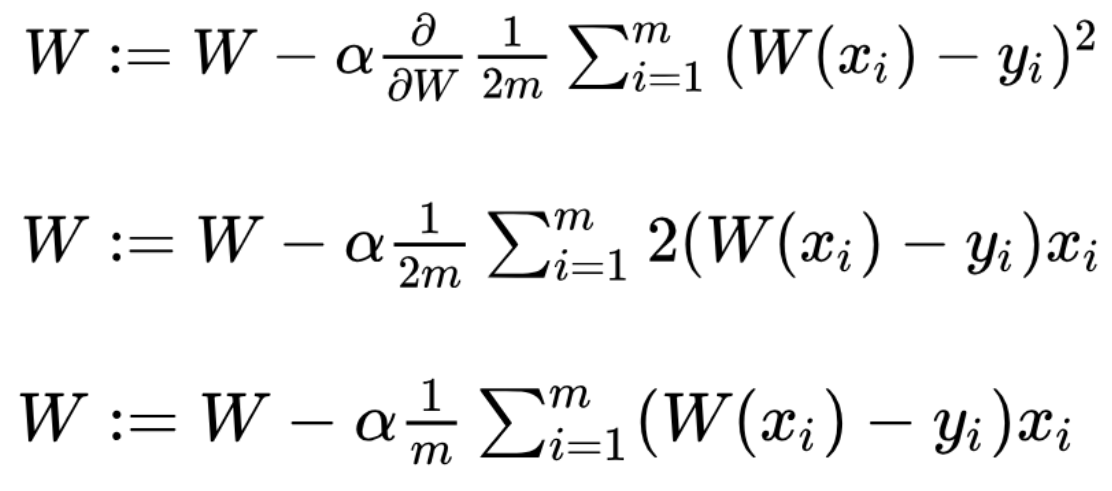
알파 : learning rate, 주로 0.001 or 0.0001을 사용함

### 볼록 함수 (Convex function)

* **어디서 시작하냐 따라서 전체의 최저점을 찾지 못할 수 있다.**
  - 주변에서 가장 낮은 지점 : local minimum
  - 항상 global minimum을 찾을 수 있다고 보장이 안됨
  - 이런 경우는 gradient descent를 사용할 수 없음
  
  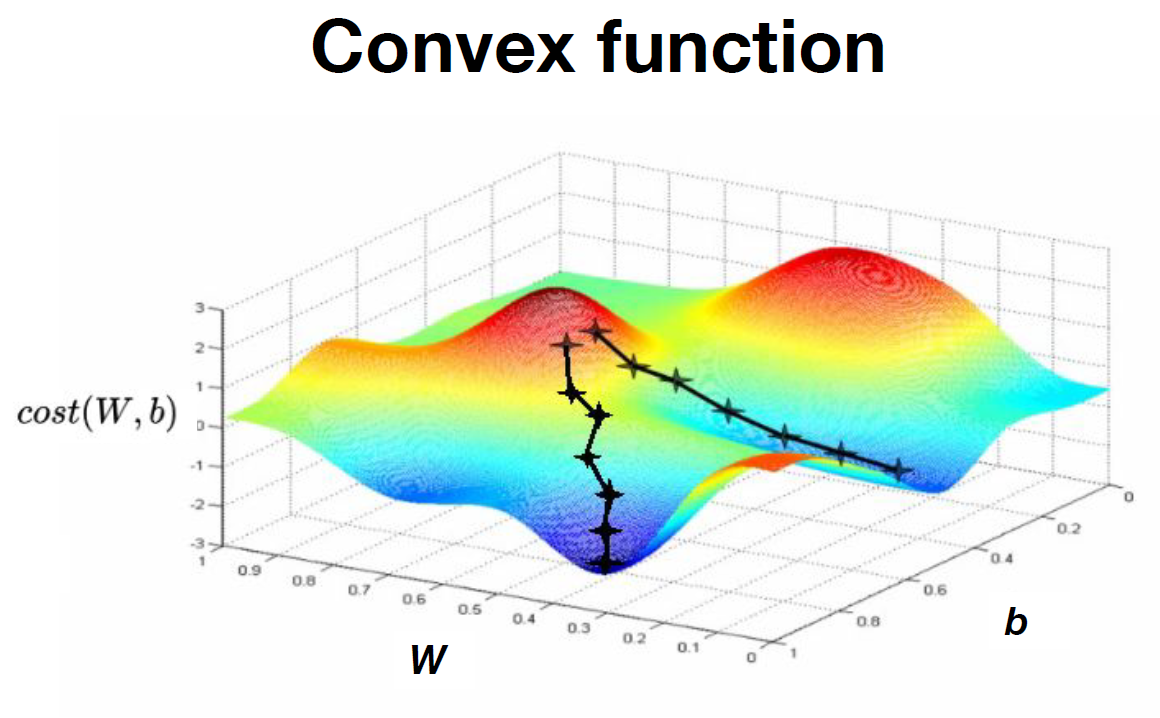

* **이런 경우는 local minimum과 global minimum이 일치한다.**
 - 이 경우에는 gradient descent를 사용할 수 있다.

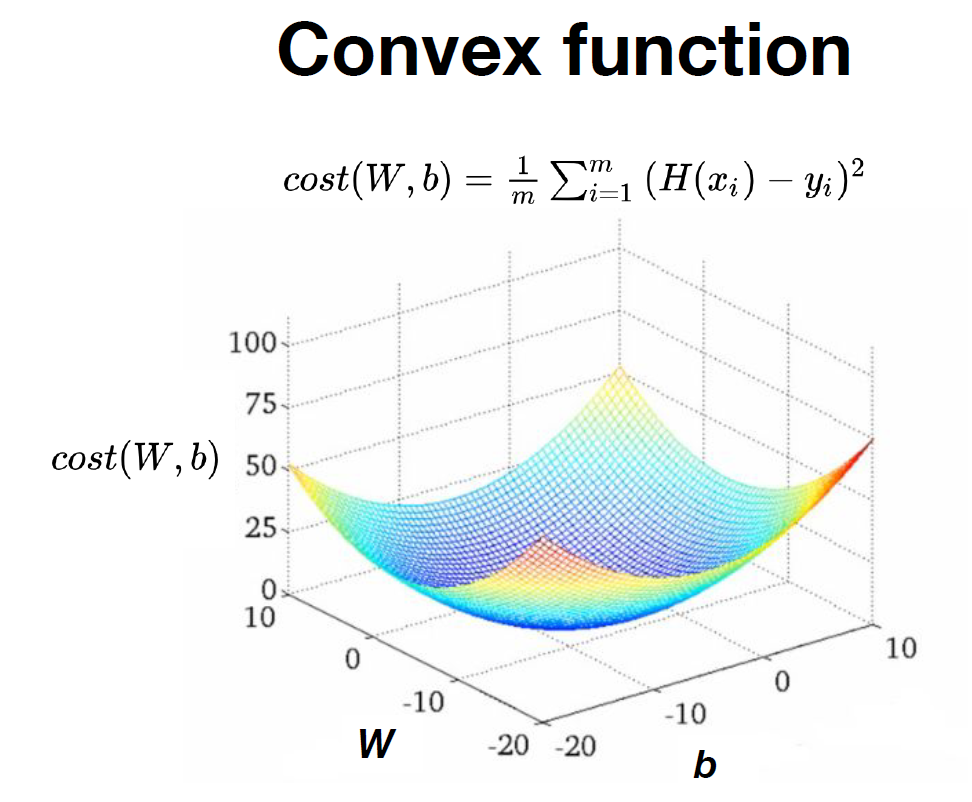

## 3강 Tensorflow 2.x 버전 실습
[github lab파일](https://github.com/Herbteaa/studyML/blob/master/edwith_DL_zero_to_all/tf_2.x/lab-03-1-Linear-Regression-and-Minimizing-Cost-eager.ipynb)

### Cost function in pure Python
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

In [39]:
import numpy as np

X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W,X,Y):
    c = 0
    for i in range(len(X)):
        c+= (W*X[i]-Y[i])**2
    return c/len(X) # cost(W)

for feed_W in np.linspace(-3,5,num=15):
    curr_cost = cost_func(feed_W,X,Y)
    print("{:6.3f} | {:10.5f}".format(feed_W,curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


### Cost function in Tensorflow
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

In [40]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W,X,Y):
    hypothesis = X*W
    return tf.reduce_mean(tf.square(hypothesis - Y)) # cost(W)

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in np.linspace(-3,5,num=15):
    curr_cost = cost_func(feed_W,X,Y)
    print("{:6.3f} | {:10.5f}".format(feed_W,curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


#### Gradient descent
$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

$$ W:=W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ i }-y^{ i } })x^{ i } }  $$

In [41]:
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,X)-Y,X))
descent = W - tf.multiply(alpha, gradient)
W.assign(descent)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0045917>

In [50]:
tf.random.set_seed(0)  # for reproducibility

# data
x_data = [1.,2.,3.,4.]
y_data = [1.,3.,5.,7.]

# random_normal : 정규분포를 따르는 한개짜리 편수를 만든다.
W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,X)-Y,X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046
